In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256

BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Sugarcane",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2745 files belonging to 5 classes.


In [5]:
class_names = dataset.class_names
class_names

['Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']

In [6]:
len(dataset)

86

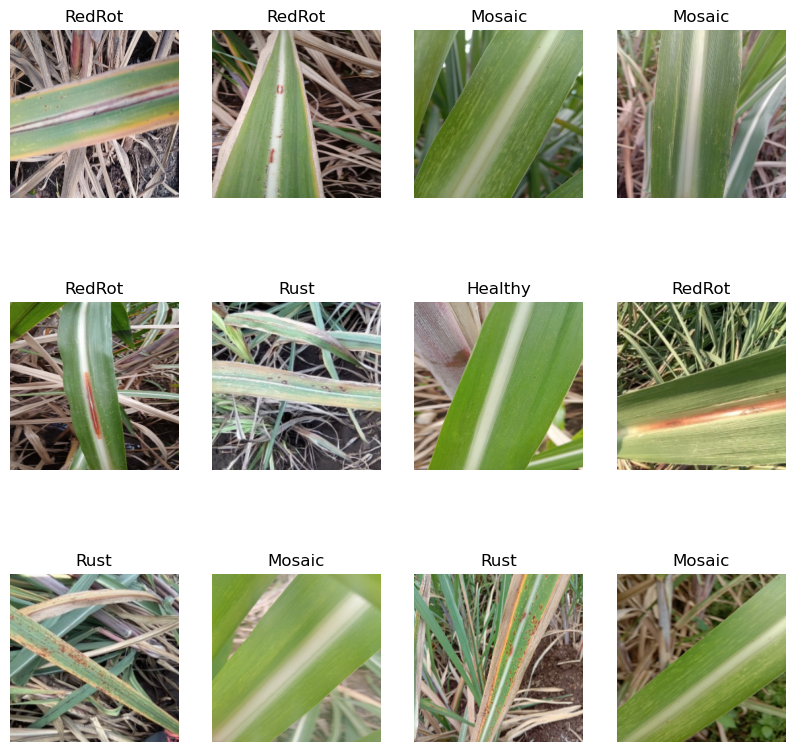

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
#     print(image_batch.shape)
#     print(label_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [8]:
len(dataset)

86

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size

68.8

In [10]:
train_ds = dataset.take(68)
len(train_ds)

68

In [11]:
test_ds = dataset.skip(68)
len(test_ds)

18

In [12]:
val_size = 0.1
len(dataset)*val_size

8.6

In [13]:
val_ds = test_ds.take(8)
len(val_ds)

8

In [14]:
test_ds = test_ds.skip(8)
len(test_ds)

10

In [15]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

68

In [18]:
len(val_ds)

8

In [19]:
len(test_ds)

10

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS )
n_classes = 5
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
        
])

model.build(input_shape = input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [26]:
history = model.fit(
train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data= val_ds
)

Epoch 1/50
68/68 [==============================] - 167s 2s/step - loss: 1.5420 - accuracy: 0.2978 - val_loss: 1.2978 - val_accuracy: 0.4336
Epoch 2/50
68/68 [==============================] - 126s 2s/step - loss: 1.2365 - accuracy: 0.4550 - val_loss: 1.1011 - val_accuracy: 0.5195
Epoch 3/50
68/68 [==============================] - 123s 2s/step - loss: 1.0140 - accuracy: 0.5689 - val_loss: 0.8839 - val_accuracy: 0.6484
Epoch 4/50
68/68 [==============================] - 121s 2s/step - loss: 0.9179 - accuracy: 0.6192 - val_loss: 0.7430 - val_accuracy: 0.6602
Epoch 5/50
68/68 [==============================] - 123s 2s/step - loss: 0.7875 - accuracy: 0.6653 - val_loss: 0.6692 - val_accuracy: 0.7305
Epoch 6/50
68/68 [==============================] - 124s 2s/step - loss: 0.7027 - accuracy: 0.7178 - val_loss: 0.6494 - val_accuracy: 0.7109
Epoch 7/50
68/68 [==============================] - 122s 2s/step - loss: 0.6818 - accuracy: 0.7372 - val_loss: 0.5187 - val_accuracy: 0.7695
Epoch 8/50
68

In [27]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 21s 387ms/step - loss: 0.2303 - accuracy: 0.9137


In [28]:
scores

[0.2302522212266922, 0.9137380123138428]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 68}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

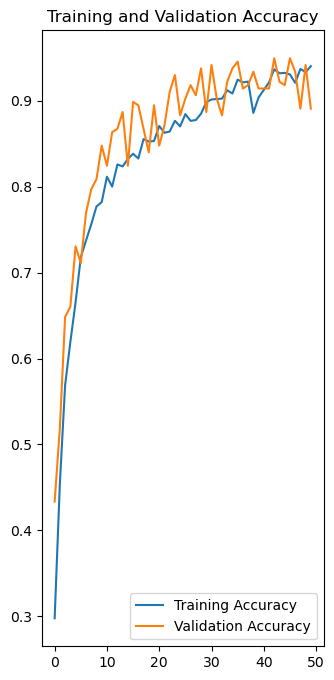

In [33]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')